# 2_Training

In [28]:
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary

In [29]:

df1 = pd.read_csv("./InoviceSample2.csv") 

In [30]:
df1.head(100)

,text,x0,x1,top,bottom,upright,direction,page_number,Class,Providercode
0,Comp Nro:,461.00,509.996,86.103,95.103,True,1,1,1,1
1,3,417.00,444.800,86.110,96.110,True,1,1,1,1
2,1695,517.00,561.480,86.110,96.110,True,1,1,1,1
3,27/08/2020,428.00,478.040,101.610,111.610,True,1,1,2,1
4,Fecha de Emisión:,341.00,420.524,102.273,111.273,True,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
95,xxxxxxxxx,52.00,100.928,191.286,199.286,True,1,1,0,2
96,xxxxxxxxx,222.19,490.032,191.286,199.286,True,1,1,0,2
97,xxxxxxxxx,21.00,111.680,208.286,216.286,True,1,1,0,2
98,xxxxxxxxx,131.00,225.264,208.286,216.286,True,1,1,0,2


In [31]:
#Checking distribution of every Class
df1['Class'].value_counts()

0    1281
1     175
4     127
2     125
3     106
5      68
Name: Class, dtype: int64

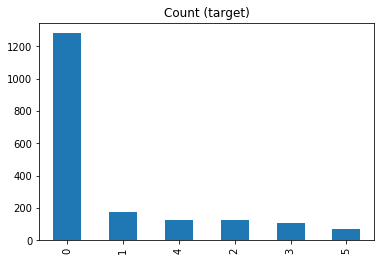

In [50]:
target_count = df1['Class'].value_counts()
target_count.plot(kind='bar', title='Count (target)')

# Data is unbalanced, so I have to find a way to solve the issue.

## Resolve unbalance issue using SMOTE

In [34]:
X = np.array(df1[['x0', 'top','x1','bottom','Providercode','page_number']].values)

In [35]:
y = np.array(df1.Class)
len(y)

1882

In [36]:
#Using SMOTE to generate extra data.

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='not majority',random_state=42)
X_smote, y_smote = smote.fit_sample(X, y) #fit_resample

In [37]:
X_smote

array([[461.       ,  86.103    , 509.996    ,  95.103    ,   1.       ,
          1.       ],
       [417.       ,  86.11     , 444.8      ,  96.11     ,   1.       ,
          1.       ],
       [517.       ,  86.11     , 561.48     ,  96.11     ,   1.       ,
          1.       ],
       ...,
       [476.638    , 660.402    , 516.919    , 669.402    ,   8.       ,
          1.8775661],
       [524.       , 726.217    , 566.784    , 734.317    ,   6.       ,
          2.       ],
       [502.45     , 702.754    , 520.53     , 710.554    ,   6.       ,
          2.       ]])

In [38]:
y_smote

array([1, 1, 1, ..., 5, 5, 5])

In [41]:
len(y_smote),len(X_smote)

(7686, 7686)

In [42]:
y_smote=list(y_smote)

In [43]:
result = dict((i, y_smote.count(i)) for i in y_smote)
print(result)

{1: 1281, 2: 1281, 0: 1281, 5: 1281, 3: 1281, 4: 1281}


In [46]:
#Specify orient='index' to create the DataFrame using dictionary keys as rows:
df=pd.DataFrame.from_dict(result, orient='index')

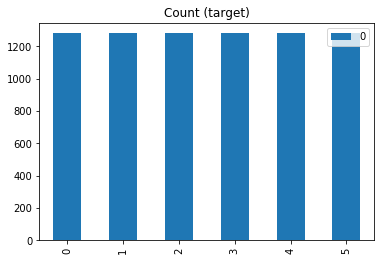

In [51]:
target_count = df.sort_index()
target_count.plot(kind='bar', title='Count (target)')

In [ ]:
#Standarizar input with maximun values.

In [58]:
X_smote.max(axis=0)

array([555.49 , 808.757, 576.351, 817.757,  11.   ,  10.   ])

In [59]:
X_smote= X_smote / X_smote.max(axis=0)

## Get Traning and Validation data

In [60]:

from sklearn.utils import shuffle
import numpy as np

In [61]:
X_smote, y_smote =shuffle(X_smote, y_smote)

In [62]:

# 20% del dataset para validación
validation = 0.20
N_validation_split = int(X_smote.shape[0]*(1-validation))
# Training Set
x_train = X_smote[:N_validation_split]
y_train = y_smote[:N_validation_split]

# Cross Validation Set
x_val = X_smote[N_validation_split:]
y_val = y_smote[N_validation_split:]

In [63]:
x_train,y_train

(array([[0.61243047, 0.0543204 , 0.74436238, 0.06590222, 0.72727273,
         0.1       ],
        [0.77049092, 0.12563724, 0.82942512, 0.13648309, 0.09823709,
         0.1       ],
        [0.67228033, 0.04766079, 0.88137611, 0.0630334 , 0.36363636,
         0.19142988],
        ...,
        [0.86035212, 0.92815642, 0.97246817, 0.92894711, 0.36363636,
         0.2       ],
        [0.65887775, 0.06540407, 0.65323041, 0.07648482, 0.54545455,
         0.2       ],
        [0.77769177, 0.91652582, 0.98870827, 0.91861845, 1.        ,
         0.1       ]]),
 [1,
  2,
  1,
  5,
  1,
  0,
  1,
  0,
  4,
  0,
  3,
  5,
  2,
  3,
  4,
  0,
  1,
  4,
  3,
  4,
  4,
  3,
  2,
  3,
  1,
  5,
  4,
  3,
  0,
  5,
  3,
  0,
  5,
  2,
  0,
  0,
  1,
  1,
  2,
  1,
  0,
  3,
  3,
  1,
  3,
  0,
  2,
  3,
  3,
  0,
  4,
  0,
  2,
  2,
  2,
  4,
  0,
  2,
  0,
  2,
  3,
  1,
  1,
  4,
  1,
  0,
  5,
  3,
  2,
  4,
  1,
  5,
  1,
  2,
  0,
  4,
  4,
  3,
  5,
  0,
  5,
  0,
  0,
  5,
  4,
  0,
  5,
  4,

In [64]:
import keras
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers, Input
from keras.utils import np_utils
import keras.backend as K

## One-hot encoding

In [65]:
y_train_categorical = keras.utils.to_categorical(y_train)
y_val_categorical = keras.utils.to_categorical(y_val)
#y_test_categorical = keras.utils.to_categorical(y_test)
print(y_train_categorical.shape)
for i in range(10):
    print(y_train[i], y_train_categorical[i])

(6148, 6)
1 [0. 1. 0. 0. 0. 0.]
2 [0. 0. 1. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 1.]
1 [0. 1. 0. 0. 0. 0.]
0 [1. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0.]
0 [1. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0.]
0 [1. 0. 0. 0. 0. 0.]


In [71]:
#Define MLP
K.clear_session()
def multi_layer_model(lr=0.001, decay=0, hidden1=800,hidden2=1600, activation='relu'):
    output_size = 6
    model = Sequential()
    # Add an input layer 
    model.add(Dense(20, activation='sigmoid', input_shape=(6,)))
    model.add(Dense(hidden1, activation=activation, kernel_initializer='normal', name='hiden1'))
    model.add(Dense(hidden2, activation=activation, kernel_initializer='normal', name='hiden2'))
    model.add(Dense(output_size, activation='softmax', kernel_initializer='normal', name='Output'))
    
    Adam = optimizers.Adam(lr=lr, decay=decay)
    model.compile(loss = 'categorical_crossentropy', optimizer=Adam, metrics=['accuracy'])
    return model



In [72]:
## Start training

In [73]:
from keras.callbacks import ReduceLROnPlateau
import time
from Helpers.fnn_helper import PlotLosses

In [74]:
checkpointer = ModelCheckpoint(filepath='one-hidden-best.mnist.hdf5', verbose=1, save_best_only=True, mode='auto', monitor='val_loss')

model_layers = multi_layer_model(lr=0.001, hidden1=800, hidden2=1600, decay=1e-8, activation='relu')  

In [75]:
model_layers.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                140       
_________________________________________________________________
hiden1 (Dense)               (None, 800)               16800     
_________________________________________________________________
hiden2 (Dense)               (None, 1600)              1281600   
_________________________________________________________________
Output (Dense)               (None, 6)                 9606      
Total params: 1,308,146
Trainable params: 1,308,146
Non-trainable params: 0
_________________________________________________________________


In [77]:
model_layers.fit(x_train, 
          y_train_categorical ,
          epochs=250, batch_size=128, 
          verbose=1, 
          validation_data=(x_val, y_val_categorical),
          callbacks=[checkpointer]) 

Epoch 1/250
49/49 [==============================] - 3s 46ms/step - loss: 1.5760 - accuracy: 0.3689 - val_loss: 0.9721 - val_accuracy: 0.5124

Epoch 00001: val_loss improved from inf to 0.97209, saving model to one-hidden-best.mnist.hdf5
Epoch 2/250
49/49 [==============================] - 2s 39ms/step - loss: 0.9203 - accuracy: 0.5309 - val_loss: 0.7954 - val_accuracy: 0.5943

Epoch 00002: val_loss improved from 0.97209 to 0.79544, saving model to one-hidden-best.mnist.hdf5
Epoch 3/250
49/49 [==============================] - 2s 40ms/step - loss: 0.7921 - accuracy: 0.5965 - val_loss: 0.9203 - val_accuracy: 0.4870

Epoch 00003: val_loss did not improve from 0.79544
Epoch 4/250
49/49 [==============================] - 2s 39ms/step - loss: 0.7845 - accuracy: 0.5859 - val_loss: 0.7715 - val_accuracy: 0.6196

Epoch 00004: val_loss improved from 0.79544 to 0.77148, saving model to one-hidden-best.mnist.hdf5
Epoch 5/250
49/49 [==============================] - 2s 38ms/step - loss: 0.7451 - a

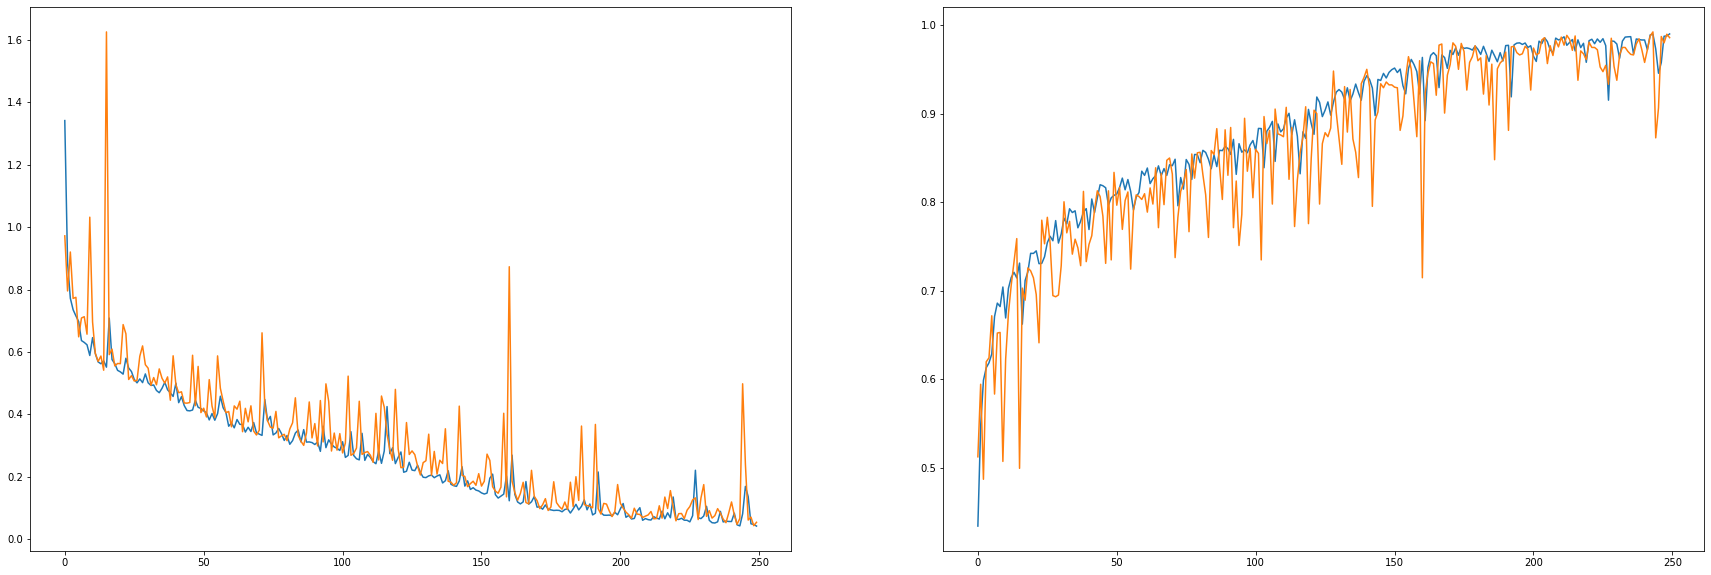

In [80]:
from matplotlib import pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.plot(model_layers.history.history['loss'])
ax1.plot(model_layers.history.history['val_loss'])
ax2.plot(model_layers.history.history['accuracy'])
ax2.plot(model_layers.history.history['val_accuracy'])

In [81]:

from Helpers.mlp_helper import plot_confusion_matrix

Confusion matrix, without normalization


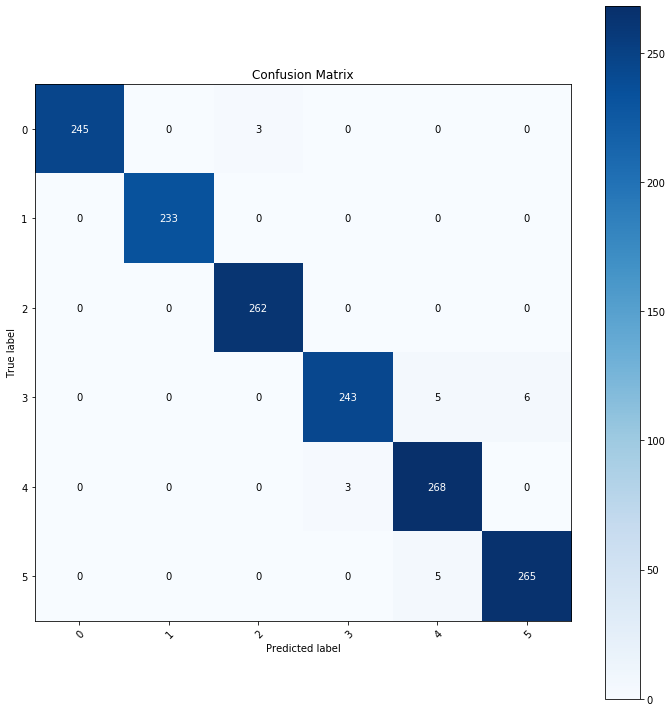

In [85]:
preds_two_layers =model_layers.predict(x_val)
plot_confusion_matrix(y_val, np.argmax(preds_two_layers, axis=1), [i for i in range(17)], title='Confusion Matrix')


In [84]:
#Save Model
model_layers.save('path_to_my_model.h5')